In [169]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from scipy import stats
from sklearn.neighbors import KernelDensity
import scipy.stats as st
import scipy

In [170]:
directory=os.getcwd()

In [171]:
fileName='n90pol.csv'
path=os.path.join(directory,fileName)

In [172]:
data=pd.read_csv(path)

In [173]:
data.columns

Index(['amygdala', 'acc', 'orientation'], dtype='object')

In [174]:
x=data.loc[:,'amygdala']

### Part 1. Density estimation: Psychological experiments. (50 points)


## a) (10points)

### <span style='color:green'>Answer</span>

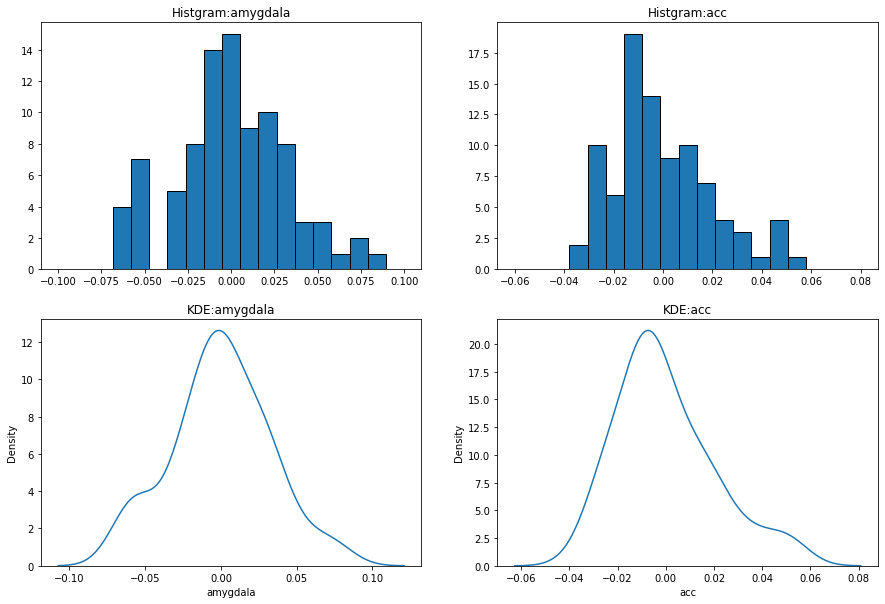

In [175]:
fig,axes=plt.subplots(2,2,figsize=(15,10))
columns=data.columns
for index in range(2):
    if index==0:
        bins=np.linspace(-0.1,0.1,20)
    else:
        bins=np.linspace(-0.06,0.08,20)
    x=data.iloc[:,index]
    axes[0][index].set_title('Histgram:{}'.format(columns[index]))
    axes[0][index].hist(x,edgecolor='black',bins=bins)
    
    
    axes[1][index].set_title('KDE:{}'.format(columns[index]))
    sns.kdeplot(x,ax=axes[1][index])
    

## b) (10points)

### <span style='color:green'>Answer</span>

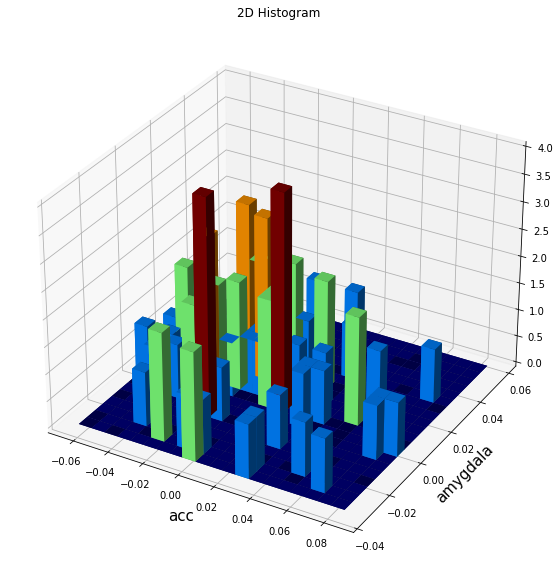

In [176]:
from matplotlib import cm

xAmplitudes =data.iloc[:,0].values
yAmplitudes =data.iloc[:,1].values
x = np.array(xAmplitudes)   #turn x,y data into numpy arrays
y = np.array(yAmplitudes)

fig = plt.figure(figsize=(20,10))          #create a canvas, tell matplotlib it's 3d
ax = fig.add_subplot(111, projection='3d')

#make histogram stuff - set bins - I choose 20x20 because I have a lot of data
hist, xedges, yedges = np.histogram2d(x, y, bins=(20,20))
xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:])

xpos = xpos.flatten()/2.
ypos = ypos.flatten()/2.
zpos = np.zeros_like (xpos)

dx = xedges [1] - xedges [0]
dy = yedges [1] - yedges [0]
dz = hist.flatten()

cmap = cm.get_cmap('jet') # Get desired colormap - you can change this!
max_height = np.max(dz)   # get range of colorbars so we can normalize
min_height = np.min(dz)
# scale each z to [0,1], and get their rgb values
rgba = [cmap((k-min_height)/max_height) for k in dz] 

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, zsort='average')
plt.title("2D Histogram")
plt.xlabel("acc",size=15)
plt.ylabel("amygdala",size=15)

plt.show()

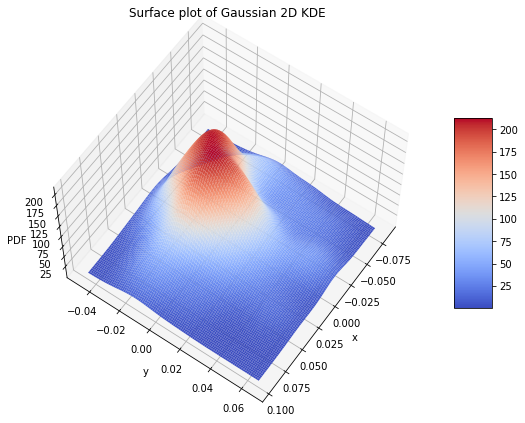

In [177]:
x=data.iloc[:,0]
y=data.iloc[:,1]

deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY

xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)
fig = plt.figure(figsize=(13, 7))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(xx, yy, f, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('PDF')
ax.set_title('Surface plot of Gaussian 2D KDE')
fig.colorbar(surf, shrink=0.5, aspect=5) # add color bar indicating the PDF
ax.view_init(60, 35)
    

## (c) (10 points) 

In [178]:
def kdeplot(data,bandwidth,sep=False,xbins=100j, ybins=100j):
    
    x=data.iloc[:,0].values
    y=data.iloc[:,1].values
    
    deltaX = (max(x) - min(x))/0.1
    deltaY = (max(y) - min(y))/0.1
    xmin = min(x)-deltaX
    xmax = max(x)+deltaX
    ymin = min(y)-deltaY
    ymax = max(y)+deltaY

    xx, yy = np.mgrid[x.min():x.max():xbins, 
                      y.min():y.max():ybins]
    
    kde_skl=KernelDensity(bandwidth=bandwidth)
    if sep:
        values_x=xx.ravel()
        kde_skl.fit(x[:,np.newaxis])
        z_x=np.exp(kde_skl.score_samples(values_x[:,np.newaxis]))
        
        valuel_y=yy.ravel()
        kde_skl.fit(y[:,np.newaxis])
        z_y=np.exp(kde_skl.score_samples(valuel_y[:,np.newaxis]))
        z=z_x*z_y
    
            
    else:
        positions = np.vstack([xx.ravel(), yy.ravel()])
        values = np.vstack([xx.ravel(), yy.ravel()]).T
        xy_train  = np.vstack([x,y]).T

        kde_skl.fit(xy_train)
        z=np.exp(kde_skl.score_samples(values))
    
    return xx,yy,np.reshape(z,xx.shape)
    

In [179]:
xx,yy,zz_xxyy=kdeplot(data,bandwidth=1,sep=False)
xx,yy,zz_xy=kdeplot(data,bandwidth=1,sep=True)
zz_=np.abs(zz_xxyy-zz_xy)

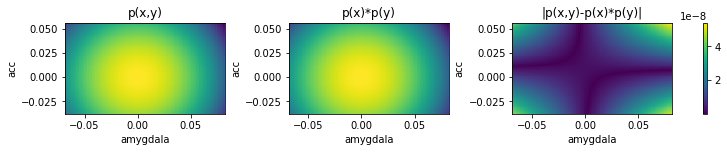

In [180]:
fig,axes=plt.subplots(1,3,figsize=(10,2), constrained_layout=True)
result=[('p(x,y)',zz_xxyy),('p(x)*p(y)',zz_xy),('|p(x,y)-p(x)*p(y)|',zz_)]

for i in range(3):
    axes[i].set_title(result[i][0])
    img=axes[i].pcolormesh(xx,yy,result[i][1],shading='auto')
    axes[i].set_xlabel('amygdala')
    axes[i].set_ylabel('acc')
    if i==2:
        fig.colorbar(img)

### <span style='color:blue'>Aanalysis</span>


 If two variables were completely independent to each other, $p(x,y)-p(x)*p(y)=0$ and the whole colormap would be covered with the dark indio.
As you can see in the last chart, some after images of bright color indicates that <b>two variables are not independent.

### (d) (10 points) 

### <span style='color:green'>Answer</span>

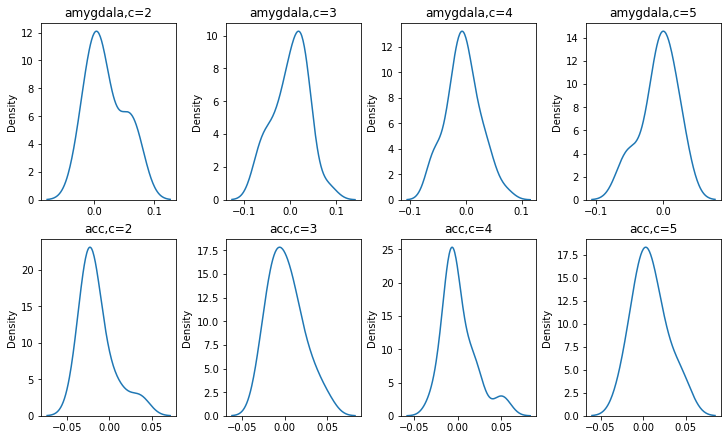

In [181]:
fig,axes=plt.subplots(2,4,figsize=(10,6), constrained_layout=True)
summary_statics={'variables':['amygdala','acc'],'2':[],'3':[],'4':[],'5':[]}
for row,col in enumerate(['amygdala','acc']):
    for value in range(2,6):
        temp=data[data['orientation']==value].iloc[:,row].values
        sns.kdeplot(temp,ax=axes[row][value-2])
        axes[row][value-2].set_title('{},c={}'.format(col,value))
        summary_statics[str(value)].append(temp.mean())
        

In [182]:
pd.DataFrame(summary_statics).set_index('variables')

,2,3,4,5
variables,,,,
amygdala,0.019062,0.000588,-0.00472,-0.005692
acc,-0.014769,0.001671,0.00131,0.008142


### <span style='color:blue'>Aanalysis</span>


Based on the summary statics we computed, we can see that the mean value differs across the level of orientations. The difference in amount can be evident if you look at the eight charts given above. Generally, if the c level goes either too small or large, the size of the mean is getting higher. The value itself scores the lowest between  3 and 4 regardless of the volume of regions. But the difference is hard to gain justification given unless our analysis depends soley on the individual effect and no statistical test is involved.

### (e) (10 points) 

In [183]:
def kdeplot(data,bandwidth,c,sep=False,xbins=100j, ybins=100j):
    
    x=data[data['orientation']==c].iloc[:,0].values
    y=data[data['orientation']==c].iloc[:,1].values
    
    deltaX = (max(x) - min(x))/0.1
    deltaY = (max(y) - min(y))/0.1
    xmin = min(x)-deltaX
    xmax = max(x)+deltaX
    ymin = min(y)-deltaY
    ymax = max(y)+deltaY

    xx, yy = np.mgrid[x.min():x.max():xbins, 
                      y.min():y.max():ybins]
    
    kde_skl=KernelDensity(bandwidth=bandwidth)
    if sep:
        values_x=xx.ravel()
        kde_skl.fit(x[:,np.newaxis])
        z_x=np.exp(kde_skl.score_samples(values_x[:,np.newaxis]))
        
        valuel_y=yy.ravel()
        kde_skl.fit(y[:,np.newaxis])
        z_y=np.exp(kde_skl.score_samples(valuel_y[:,np.newaxis]))
        z=z_x*z_y
    
            
    else:
        positions = np.vstack([xx.ravel(), yy.ravel()])
        values = np.vstack([xx.ravel(), yy.ravel()]).T
        xy_train  = np.vstack([x,y]).T

        kde_skl.fit(xy_train)
        z=np.exp(kde_skl.score_samples(values))
    
    return xx,yy,np.reshape(z,xx.shape)
    

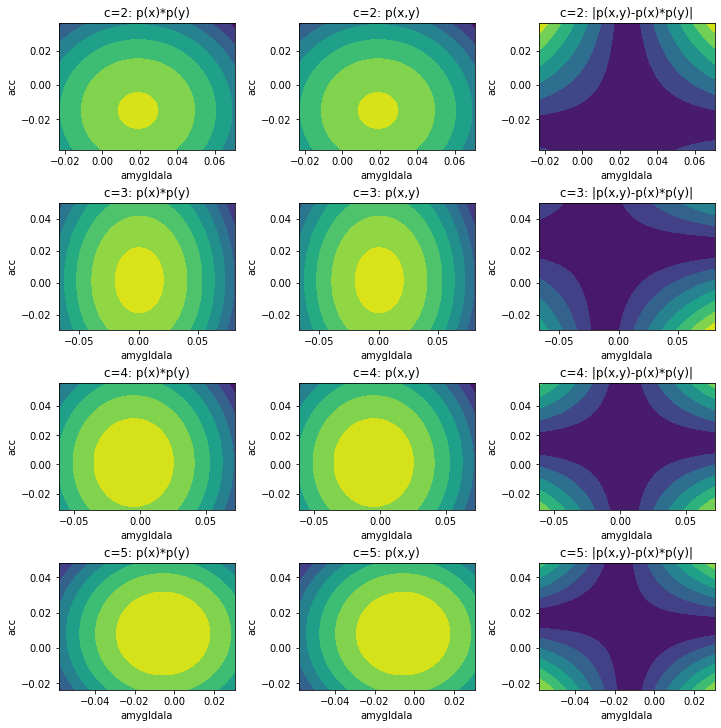

In [184]:
fig,axes=plt.subplots(4,3,figsize=(10,10),constrained_layout=True)

for row,c in enumerate(range(2,6)):
    temp=[]
    for col,sep in enumerate([True,False,None]):
        if sep!=None:
            xx,yy,zz=kdeplot(data,0.75,c,sep=sep)
            temp.append(zz)
        else:
            zz=np.abs(temp[0]-temp[1])
        axes[row][col].contourf(xx,yy,zz)
        if sep==True:
            title='p(x)*p(y)'
        elif sep==False:
            title='p(x,y)'
        else:
            title='|p(x,y)-p(x)*p(y)|'
        axes[row][col].set_title('c={}: {}'.format(c,title))
        axes[row][col].set_xlabel('amygldala')
        axes[row][col].set_ylabel('acc')
        


### <span style='color:blue'>Aanalysis</span>

Look at the middle plots across the levels of c. You can easily see that the area of yellow color is bigger if the number of c increases, which indicates more data becomes distributed around the center and getting approximated to gaussian distribution. 
Based on the findings, we should suggest that  depending on the polictial view each participant takes,the brain structure can be shaped in a different manner.



### Part 2.  Implementing EM for MNIST dataset (50 points).


### (b) (10 points) 


1) E-step


$$\tau_{k}^{i}=\frac{\Phi_{k}\cdot\ N(x_{i};\mu_{k},\Sigma_{k})}{\Sigma^{K}_{l=1}\Phi_{l}\cdot\ N(x_{i};\mu_{l},\Sigma_{l})}\\
            =\frac{\Phi_{k}|\Sigma_{k}|^{-\frac{1}{2}}exp(-\frac{1}{2}(x_{i}-\mu_{k})^{T}\Sigma^{-1}(x_{i}-\mu_{k}))}
              {\Sigma_{l=1}^{K}\{\Phi_{l}|\Sigma_{l}|^{-\frac{1}{2}}exp(-\frac{1}{2}(x_{i}-\mu_{l})^T\Sigma^{-1}(x_{i}-\mu_{l})       \}}$$


2) M-step

$$\Phi_{k}=\frac{1}{n}\Sigma_{i=1}^{n}\tau^{i}_{k}\\
\mu_{k}=\frac{\Sigma_{i=1}^{n}\tau_{k}^{i}x_{i}}{\Sigma_{i=1}^{n}\tau_{k}^{i}}\\
\Sigma_{k}=\frac{\Sigma_{i=1}^{n}\tau_{k}^{i}(x_{i}-\mu_{k})(x_{i}-\mu_{k})^T}{\Sigma_{i=1}^{n}\tau_{k}^{i}}$$

where

k is the cluster index.

n is the the total number of data point


### (c) (16 points) 

In [199]:
import scipy.io as sio
data=sio.loadmat('data.mat')['data']
label=sio.loadmat('label.mat')['trueLabel']

In [200]:
from sklearn.decomposition import PCA
from scipy.stats import multivariate_normal
import copy
pca=PCA(n_components=4)
data_t=pca.fit_transform(data.T)

In [201]:
data_c=copy.deepcopy(data_t)

In [202]:
class GMM(object):
    def __init__(self, X, k=2):
        # dimension
        X = np.asarray(X)
        self.m, self.n = X.shape
        self.data = X.copy()
        # number of mixtures
        self.k = k
        self.result={}
        
    def initialize(self):
        # init mixture means/sigmas
        
        self.mean_arr=np.asmatrix([list(np.zeros(self.n)) for _ in range(self.k)])
        
        s1=np.random.uniform(low=data.min(),high=data.max(),size=(self.n,self.n))
        s2=np.random.uniform(low=data.min(),high=data.max(),size=(self.n,self.n))
        cov_1=s1.dot(s1.T)+np.eye(self.n)
        cov_2=s2.dot(s2.T)+np.eye(self.n)
        self.sigma_arr=np.array([list(cov_1),list(cov_2)])
        
        self.phi = np.ones(self.k)/self.k
        self.w = np.asmatrix(np.empty((self.m, self.k), dtype=float))
            
    
    def fit(self, tol=1e-4):
        self.initialize()
        num_iters = 0
        ll = 1
        previous_ll = 0
        while(ll-previous_ll > tol):
            previous_ll = self.loglikelihood()
            self.e_step()
            self.m_step()
            num_iters += 1
            ll = self.loglikelihood()
            self.result[num_iters]=ll
    
    def loglikelihood(self):
        ll = 0
        for i in range(self.m):
            tmp = 0
            for j in range(self.k):
                #print(self.sigma_arr[j])
                tmp += multivariate_normal.pdf(self.data[i, :], 
                                                        self.mean_arr[j, :].A1, 
                                                        self.sigma_arr[j, :]) *\
                       self.phi[j]
            ll += np.log(tmp) 
        return ll
    
        
    def e_step(self):
        for i in range(self.m):
            den = 0
            for j in range(self.k):
                num =multivariate_normal.pdf(self.data[i, :], 
                                                       self.mean_arr[j].A1, 
                                                       self.sigma_arr[j]) *\
                      self.phi[j]
                den += num
                self.w[i, j] = num
            self.w[i, :] /= den
            assert self.w[i, :].sum() - 1 < 1e-4
            
    def m_step(self):
        for j in range(self.k):
            const = self.w[:, j].sum()
            self.phi[j] = 1/self.m * const
            _mu_j = np.zeros(self.n)
            _sigma_j = np.zeros((self.n, self.n))
            for i in range(self.m):
                _mu_j += (self.data[i, :] * self.w[i, j])
                _sigma_j += self.w[i, j] * ((self.data[i, :] - self.mean_arr[j, :]).T * (self.data[i, :] - self.mean_arr[j, :]))
            self.mean_arr[j] = _mu_j / const
            self.sigma_arr[j] = _sigma_j / const

In [203]:
gmm=GMM(data_c)

In [204]:
gmm.fit()

In [205]:
log_result=gmm.result

Text(0.5, 0, 'iterations')

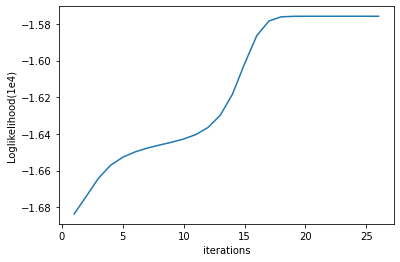

In [207]:
data=list(map(lambda x: x/10000,log_result.values()))
plt.plot(log_result.keys(),data)
plt.ylabel('Loglikelihood(1e4)')
plt.xlabel('iterations')


### (d) (12 points)

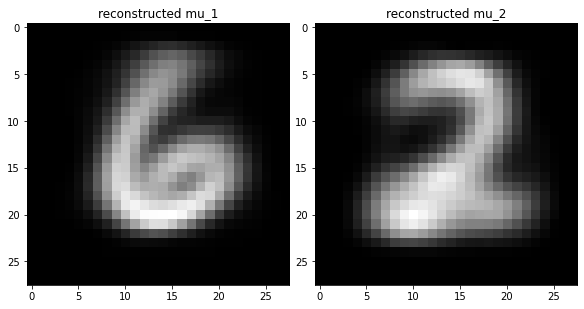

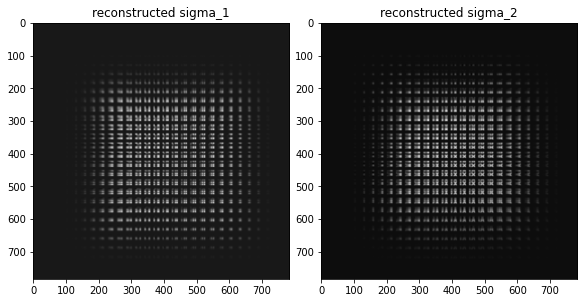

In [208]:
fig,axes=plt.subplots(1,2,figsize=(8,8),constrained_layout=True)

for i,value in enumerate([1,2]):
    temp=pca.inverse_transform(gmm.mean_arr[i])
    temp=temp.reshape((28,28)).T
    axes[i].imshow(temp,cmap=plt.cm.gray)
    axes[i].set_title("reconstructed mu_{}".format(value))
    
    
fig,axes=plt.subplots(1,2,figsize=(8,8),constrained_layout=True)
for i,value in enumerate([1,2]):
    temp=pca.inverse_transform(gmm.sigma_arr[i])
    temp=temp.T.dot(temp)
    axes[i].imshow(temp,cmap='gray')
    axes[i].set_title("reconstructed sigma_{}".format(value))
    


### (e) (12 points)

In [219]:
from sklearn.cluster import KMeans
kmean=KMeans(n_clusters=2)

In [220]:
predicts=[np.argmax(gmm.w,axis=1),kmean.fit_predict(data_c)]

In [221]:
final_result={'2':[],'6':[],'model':[]}

In [222]:
for index,model in enumerate(['GMM','KMean']):
    final_result['model'].append(model)
    counts={2:0,6:0}
    predict=[ 6 if p==0 else 2   for p in predicts[index]]
    for p,l in zip(predict,label[0]):
        if p==l:
            counts[p]+=1
    for value in [2,6]:
        total=len(np.where(label==value)[0])
        final_result[str(value)].append(str(round(counts[value]/total,2)*100)+'%')
    

In [223]:
pd.DataFrame(final_result).set_index('model')

,2,6
model,,
GMM,94.0%,99.0%
KMean,94.0%,92.0%


### <span style='color:blue'>Aanalysis</span>

From the result above, GMM has acheived a better result thatn Kmean.